[View in Colaboratory](https://colab.research.google.com/github/yomnabarakate21/Computer-vision-Course-assignments/blob/master/assignm_1.ipynb)

In [0]:
import random;
from pylab import *
from numpy import *;
import cv2 
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the image
test_downloaded=drive.CreateFile({'id':'1CV5O96rjh4XtKW7DJo_mFpffIwsUQw0Q'})
#test_downloaded = drive.CreateFile({'id':'1bX53PbUb8-fGBP3q0s89y4GqV5YtYFwa'}) # replace the id with id of file you want to access
#test_downloaded = drive.CreateFile({'id':'1XNU2FZKIm8xde7fGMI2_UpRurdZ5jaGc'}) # replace the id with id of file you want to access
test_downloaded.GetContentFile('img.PNG')

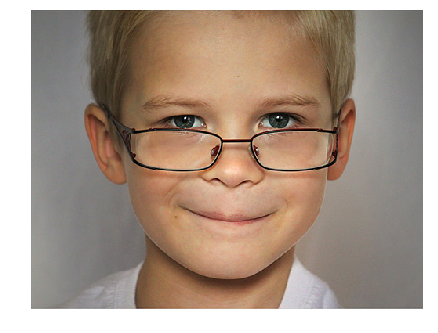

(382, 500, 3)


In [7]:

img = cv2.imread('img.PNG')
b,g,r = cv2.split(img)       # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb
plt.imshow(rgb_img)
# to hide tick values on X and Y axis
plt.axis('off')
plt.show()
print(rgb_img.shape)

# Convert RGB to grey scaled image

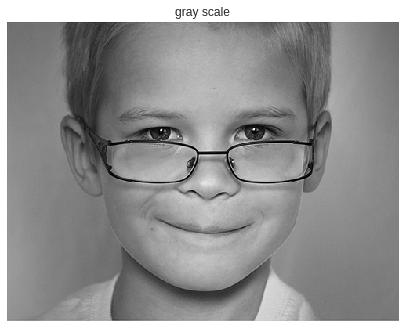

In [8]:
gray_img=cv2.cvtColor(rgb_img,cv2.COLOR_RGB2GRAY);
#plt.subplot(221),plt.imshow(rgb_img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.imshow(gray_img,cmap="gray"),plt.title('gray scale'),plt.xticks([]), plt.yticks([])  
plt.show()
